# Introduction to Data Science, CS 5963 / Math 3900
## Lecture 13: Dimensionality Reduction

We'll introduce principal component analysis (PCA), an unsupervised method for dimensionality reduction and visualization. For an implementaiton of PCA, we'll use the Python library [scikit-learn](http://scikit-learn.org/). 

Recommended Reading: ISLR Ch. 10 

### Recall: Supervised vs. Unsupervised Learning

**Supervised Learning:** 

Data: both the features, x, and a response, y, for each item in the dataset. 

Goal: ‘learn’ how to predict the response from the features.

Examples:
* Regression
* Classification (Logistic Regression, SVM, decision trees, ...)
 
**Unsupervised Learning**

Data: only the features, x, for each item in the dataset. 

Goal: discover ‘interesting’ things about the dataset. 

Examples:
* Clustering (k-means, hierarchical clustering, ...)
* Principal Component Analysis (PCA)

### Principal Component Analysis (PCA)

Before we get into the mathematical description of PCA, we can gain a lot of intuition by taking a look at the visual overview, by Victor Powell [here](http://setosa.io/ev/principal-component-analysis/).

*Problem:* Many datasets have too many features to be able to explore or understand in a reasonable way. Its difficult to even make a reasonable plot for a high-dimensional dataset.

*Idea:* Find a small number of new features, which are linear combinations of the old features, that 'explain' most of the variance in the data. The *principal component directions* are the directions in feature space in which the data is the most variable. 

Let the $p$ features be $x = (x_1, x_2, \ldots x_p)$. We define a new feature, the *first principal component direction*, by 
$$
z_1 = \phi_{1,1} x_1 + \phi_{2,1} x_2 + \cdots + \phi_{p,1} x_p = \phi_1^t x 
$$
Here, the coefficients $\phi_{j,1}$ are the *loadings* of the $j$-th feature on the first principal component. The vector $\phi_1 = (\phi_{1,1}, \phi_{2,1},\cdots, \phi_{p,1})$ is called the *loadings vector* for the first principal component. 

We want to find the loadings so that $z_1$ has maximal sample variance. 

Let $X$ be the $n\times p$ matrix where $X_{i,j}$ is the $j$-th feature for item $i$ in the dataset. $X$ is just the collection of the data in a matrix. 

*Important:* Assume each of the variables has been normalized to have mean zero, *i.e.*, the columns of $X$ should have zero mean. 

A short calculation shows that the sample variance of $z_1$ is then given by 
$$
Var(z_1) = \frac{1}{n} \sum_{i=1}^n \left( \sum_{j=1}^p \phi_{j,1} X_{i,j} \right)^2. 
$$
The variance can be arbitrarily large if the $\phi_{j,1}$ are allowed to be arbitrarily large. We constrain the $\phi_{j,1}$ to satisfy $\sum_{j=1}^p \phi_{j,1}^2 = 1$. In vector notation, this can be written $\| \phi_1 \| = 1$.

Putting this together, the first principal component is defined by $z_1 = \phi_1^t x$ where $\phi_1$ is the solution to the optimization problem 
\begin{align*}
\max_{\phi_1} \quad & \textrm{Var}(z_1) \\
\text{subject to} \quad & \| \phi_1\|^2 = 1. 
\end{align*}
Using linear algebra, it can be shown that $\phi_1$ is exactly the eigenvector corresponding to the largest eigenvalue of the *Gram matrix*, $X^tX$. 

We similarly define the second principal direction to be the linear combination of the features, 
$z_2 = \phi_2^t x$ with the largest variance, subject to the additional constraint that $z_2$ be uncorrelated with $z_1$. This is equivalent to $\phi_1^t \phi_2 = 0$. This corresponds to taking $\phi_2$ to be the eigenvector corresponding to the second largest eigenvalue of $X^tX$. Higher principal directions are defined analogously. 

### PCA in practice

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import homogeneity_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import seaborn as sns

### The Iris dataset

The dataset contains 4 features (attributes) of 50 samples containing 3 different types of iris plants. The goal is to classify the type of iris plant given the attributes. 

**Features (attributes):**
1. sepal length (cm) 
+ sepal width (cm) 
+ petal length (cm) 
+ petal width (cm) 

**Classes:**
1. Iris Setosa 
+ Iris Versicolour 
+ Iris Virginica

In [2]:
# import dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

### Some previous plotting ideas 
* just plot along first two dimensions and ignore other dimensions
* make a scatterplot matrix with all pairs of dimensions
* 3d scatter plot

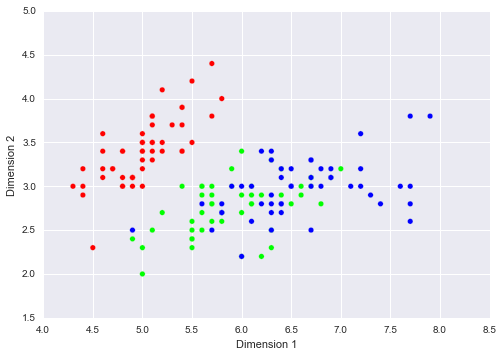

In [3]:
# plot along first two dimensions and ignore other diemtnsion

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,s=30)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

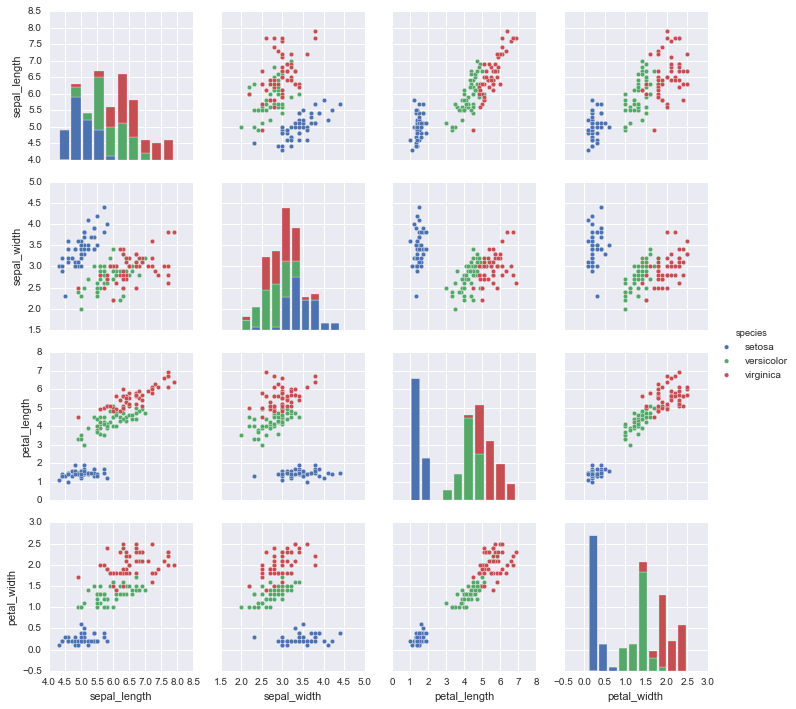

In [4]:
# scatterplot matrix
sns.set()
sns.pairplot(sns.load_dataset("iris"), hue="species");

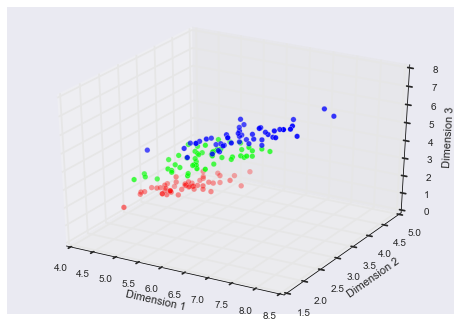

In [5]:
# 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],zs= X[:, 2], c=y, cmap=cmap_bold,s=30)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()

### New idea: use PCA to plot the 2 most 'important' directions

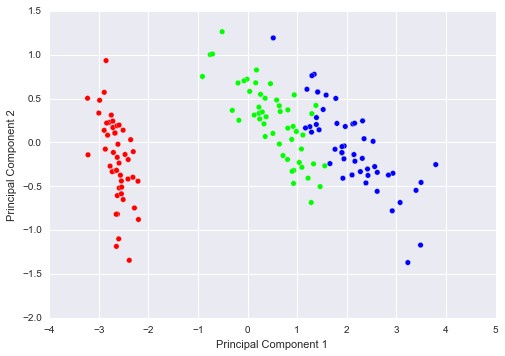

In [6]:
# PCA analysis 
pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y, cmap=cmap_bold,s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Example: Visualizing Clustering data
The pricipal components are very helpful for visualizing clustering data. 


homogeneity score for clustering is 0.795981622781


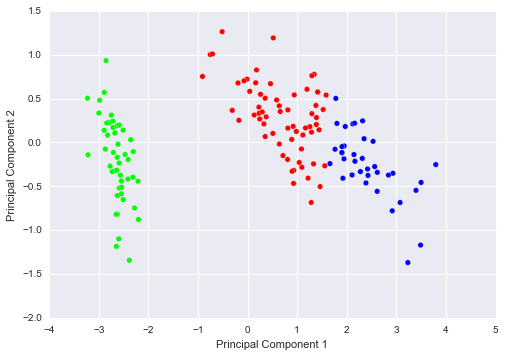

In [7]:
cluster_model = AgglomerativeClustering(linkage="average", affinity='euclidean', n_clusters=3)
y_pred = cluster_model.fit_predict(X)
h = homogeneity_score(labels_true = y, labels_pred = y_pred)
print('homogeneity score for clustering is ' + str(h))

# plot using PCA
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y_pred, cmap=cmap_bold,s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Number of principal components

For plotting the data, we generally just use the first 2 principal components. In other applications requiring dimensionality reduction, you might want to indentify the number of principal components that can be used to explain the data. This can be done by considering the percentatge of variance explained by each component or a *scree plot*. 

In [8]:
pca_model.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])